# Report on Logistic Regression Model for Employee Attrition Prediction
## Introduction:
The purpose of this report is to analyze the performance of a logistic regression model in predicting employee attrition based on various factors present in the dataset. The dataset used for this analysis contains information about employees' demographics, job roles, satisfaction levels, and other relevant features.

## Data Preprocessing:
- Upon initial inspection, the dataset contains 1470 observations and 35 features.
- No duplicate records were found, and there were no missing values in any of the columns.
- The dataset was divided into categorical and numeric features for further analysis.
- Categorical features were encoded using label encoding to convert them into numerical values for modeling.

## Exploratory Data Analysis (EDA):
- EDA was conducted to understand the distribution of various features and their relationship with the target variable, "Attrition."
- Age, Monthly Rate, and Job Role were some of the features explored in relation to attrition.
- Significant differences were observed in attrition rates across different age groups and job roles.

## Model Building:
- Logistic regression was chosen as the predictive model due to its suitability for binary classification tasks.
- The dataset was split into training and testing sets, with 80% of the data used for training and 20% for testing.
- The logistic regression model was trained on the training data and evaluated on the testing data.

## Model Evaluation:
- The model achieved an accuracy of 89.12% on the testing data, indicating its ability to correctly classify employees into attrition and non-attrition categories.
- The precision and recall values for predicting attrition were 82% and 23%, respectively.
- The model's performance was further evaluated using a confusion matrix, which revealed 253 true negatives, 9 true positives, 30 false negatives, and 2 false positives.

## Model Interpretation:
- The probability plot displayed the distribution of predicted probabilities, showing the model's confidence in its predictions.
- The ROC curve illustrated the model's ability to discriminate between attrition and non-attrition cases, with an AUC of 0.86 indicating reasonable performance.

## Conclusion:
- The logistic regression model demonstrated promising results in predicting employee attrition based on the given features.
- Further analysis and feature engineering could potentially enhance the model's performance and provide more actionable insights for employee retention strategies.

## Recommendations:
- Continuation of data collection to incorporate additional relevant features could improve the model's predictive power.
- Regular monitoring and updating of the model to adapt to changing patterns and trends in employee attrition.
- Collaboration with HR professionals to integrate model predictions into decision-making processes for proactive attrition management.
Overall, the logistic regression model serves as a valuable tool for understanding and predicting employee attrition, aiding organizations in developing strategies to retain valuable talent and maintain workforce stability.

In [1]:
 # Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import binom
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:

df=pd.read_csv('/kaggle/input/hr-analytics-prediction/HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
# Define the bins for age categories
bins = [18, 30, 40, 50, 60, float('inf')]  # Adjust the ranges as needed
labels = ['18-30', '31-40', '41-50', '51-60', '60+']
# Create a new column with the age categories
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Define the bins for 'MonthlyRate' column with a distance of 2000
bins = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, np.inf]  
# Define the labels for each bin
labels = ['0-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000', '10001-12000', 
          '12001-14000', '14001-16000', '16001-18000', '18001-20000', '20001+']
# Create a new column with the binned categories
df['MonthlyRate_Category'] = pd.cut(df['MonthlyRate'], bins=bins, labels=labels, right=False)

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Category,MonthlyRate_Category
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,41-50,18001-20000
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,41-50,20001+
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,31-40,2001-4000
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,31-40,20001+
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,18-30,16001-18000


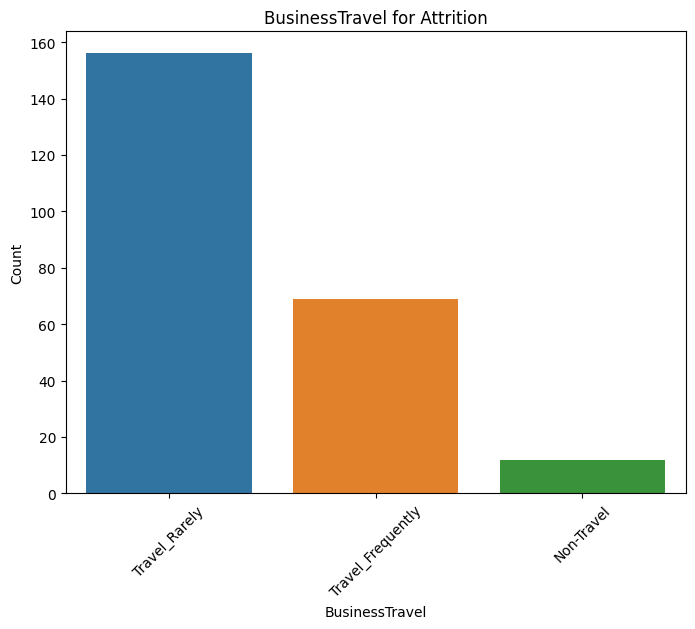

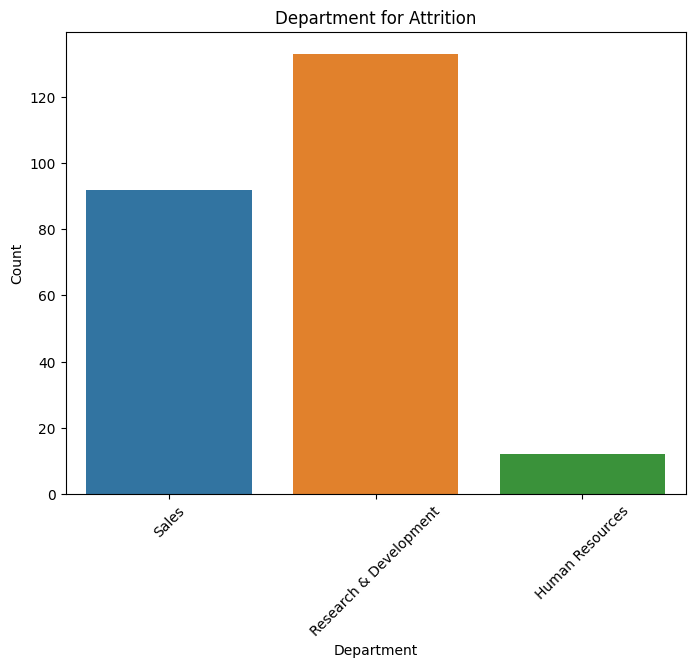

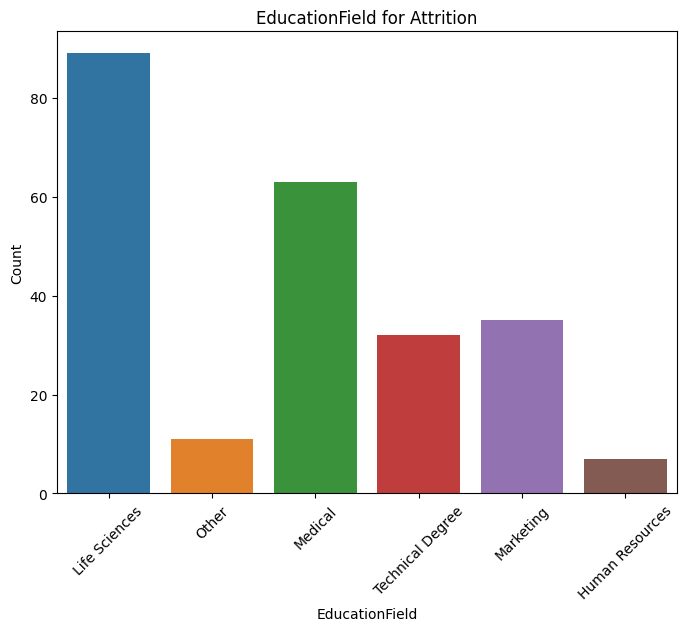

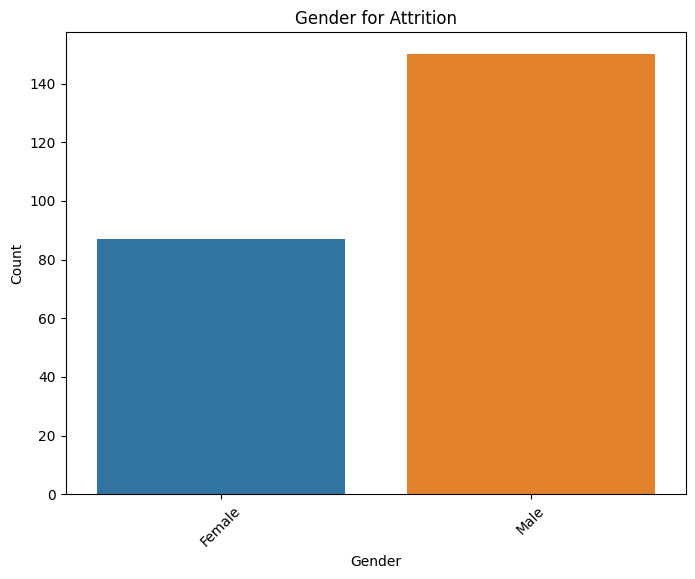

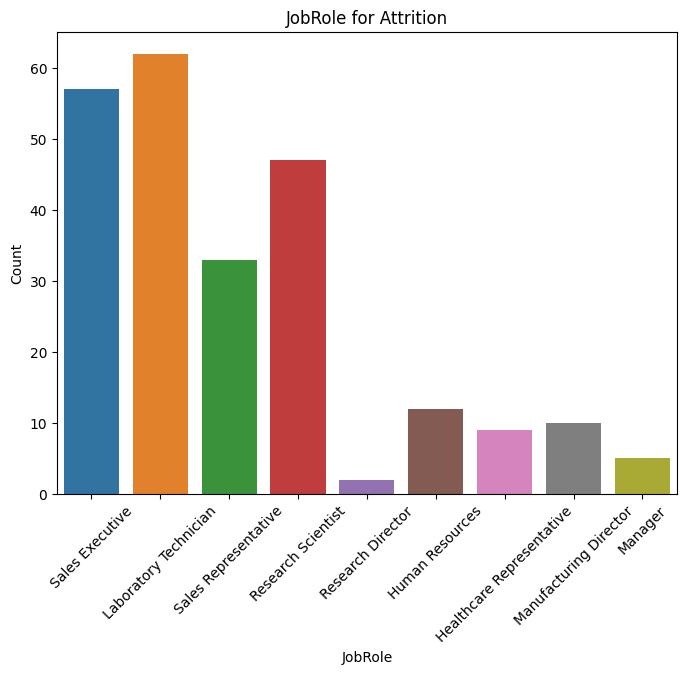

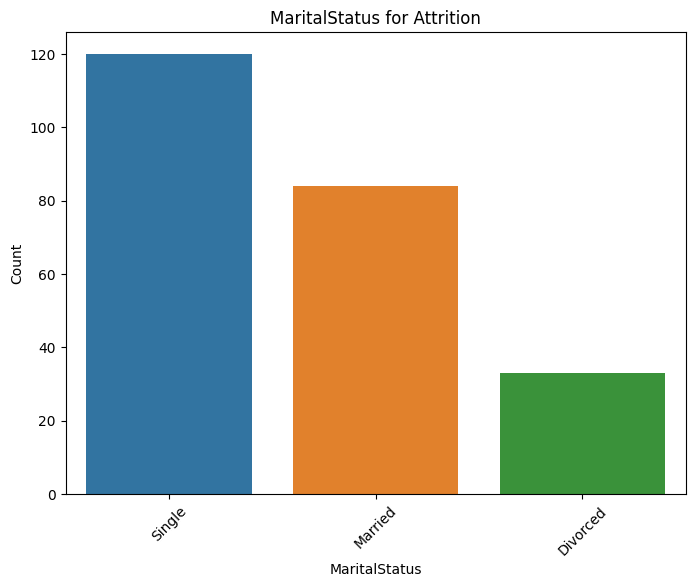

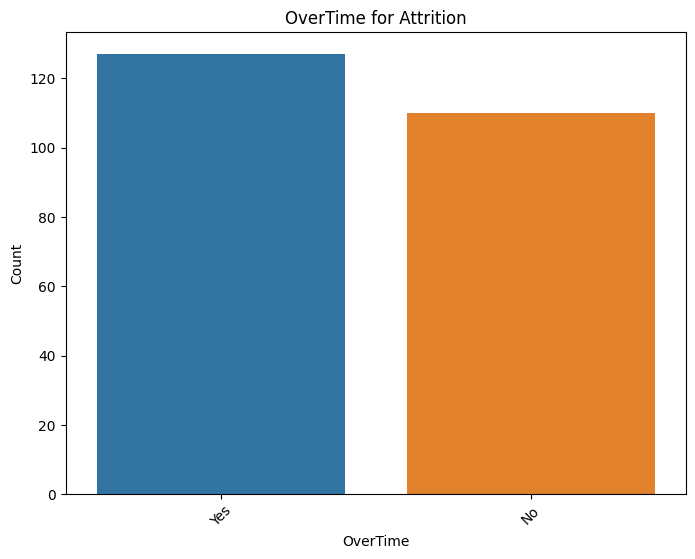

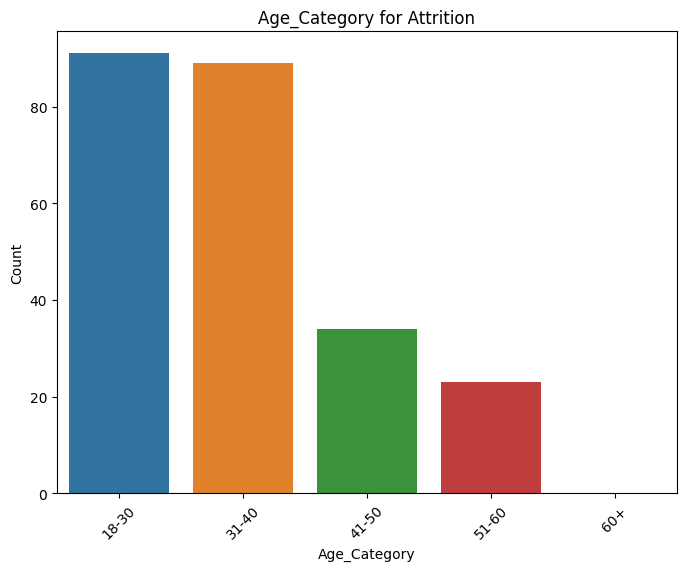

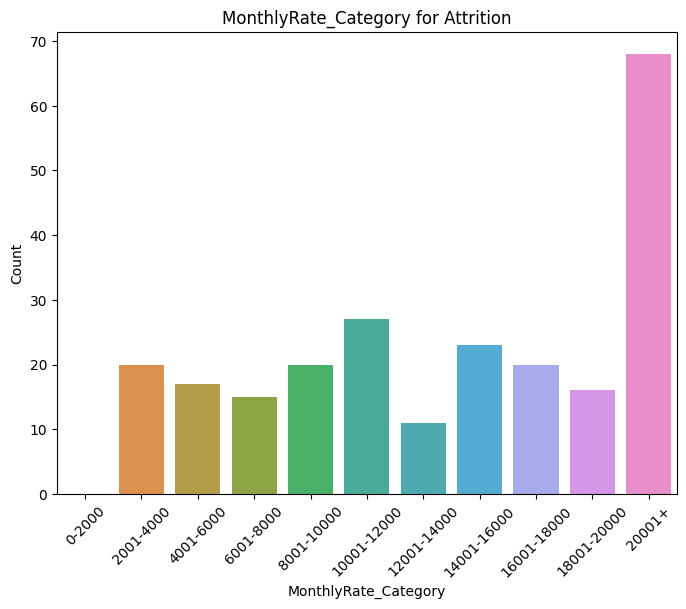

In [9]:
# Get the object columns
object_columns = df.select_dtypes(include=['object','category']).columns
object_columns = object_columns.drop('Over18')
# Filter the DataFrame for 'Attrition' equal to 'Yes'
df_yes_attrition = df[df['Attrition'] == 'Yes']
# Loop through each object column
for column in object_columns:
    if column != 'Attrition':  # Skip the 'Attrition' column itself
        # Create a bar plot for value counts of the current column for 'Attrition' equal to 'Yes'
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df_yes_attrition, x=column)
        plt.title(f'{column} for Attrition')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

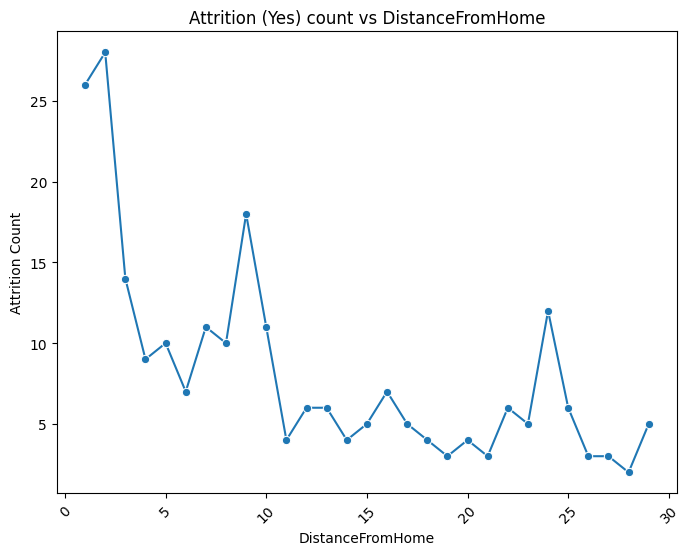

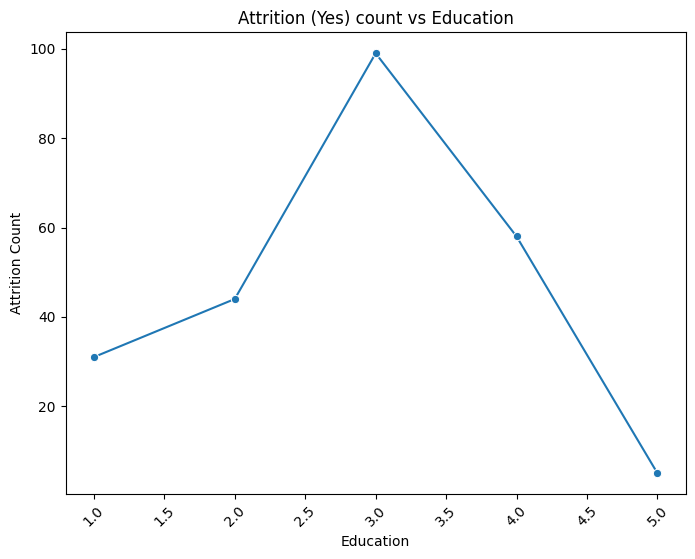

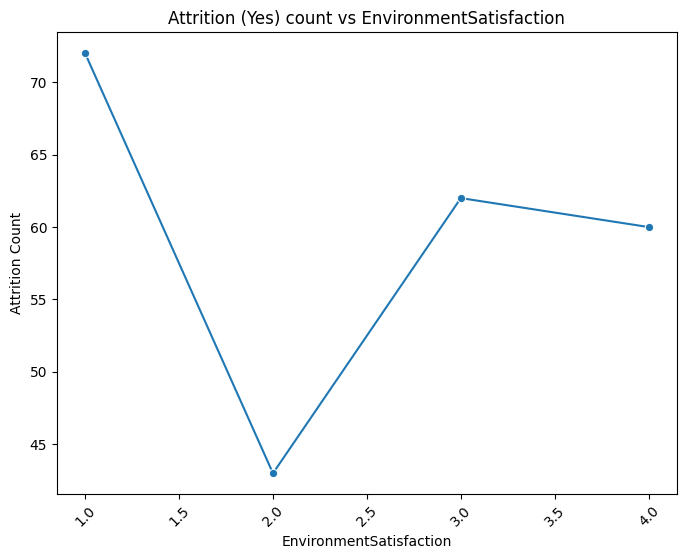

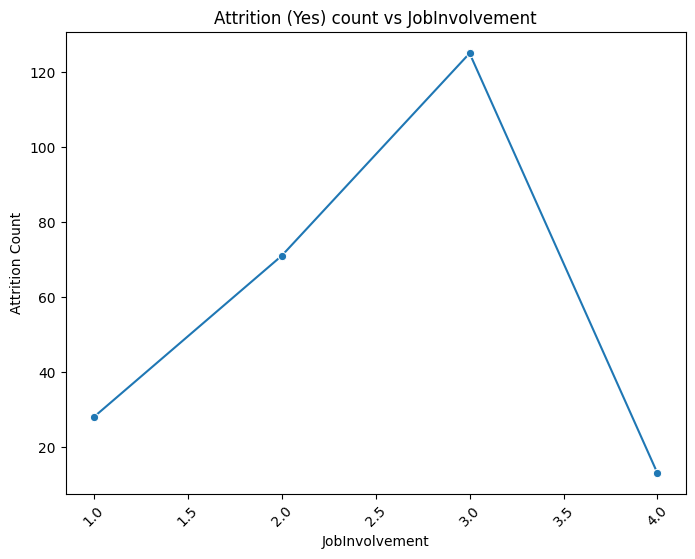

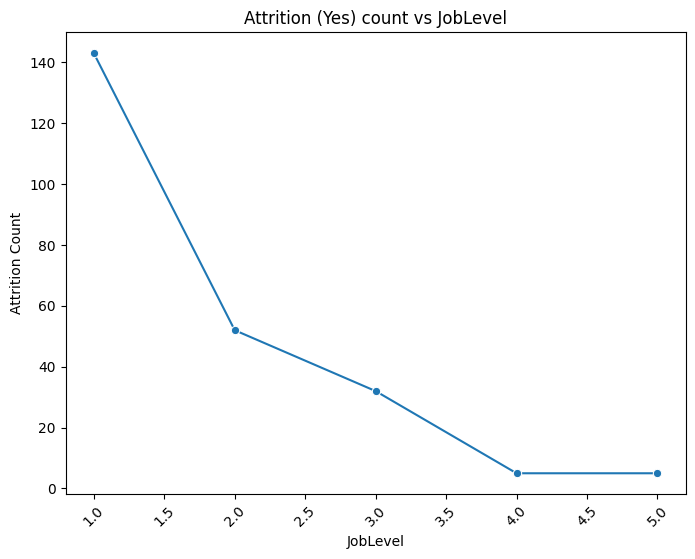

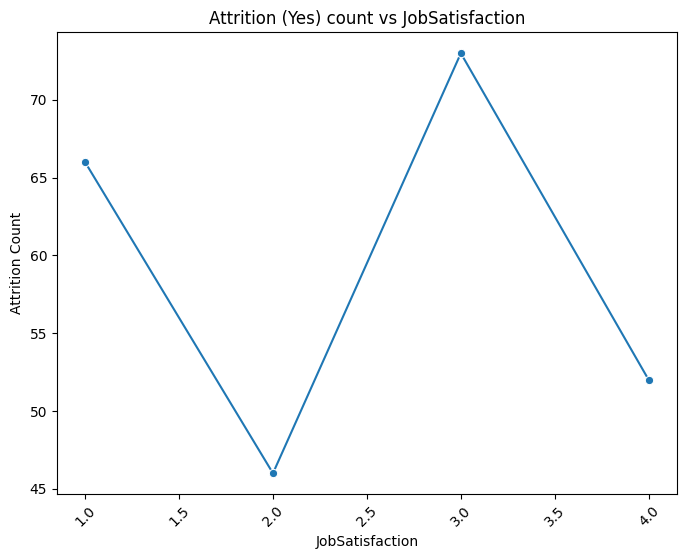

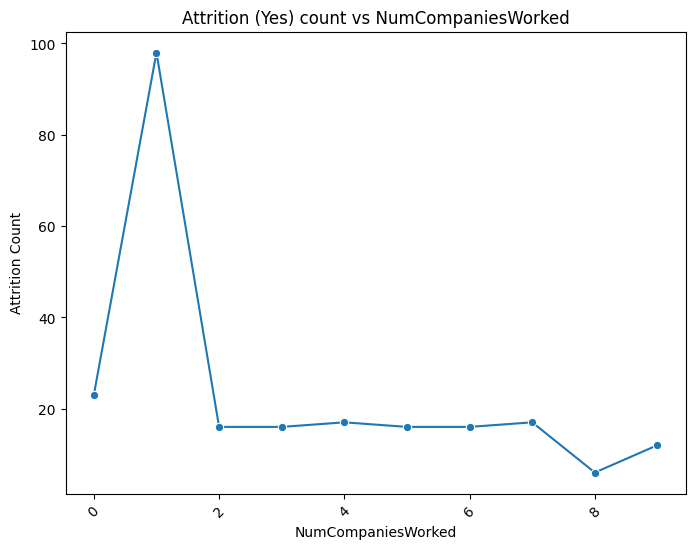

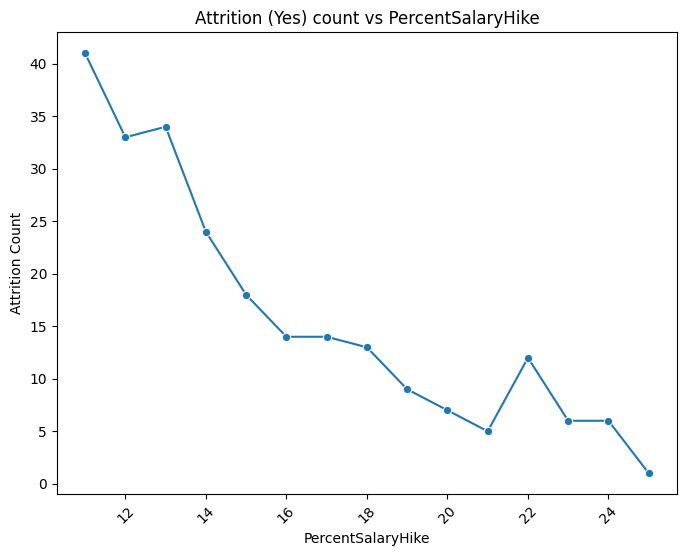

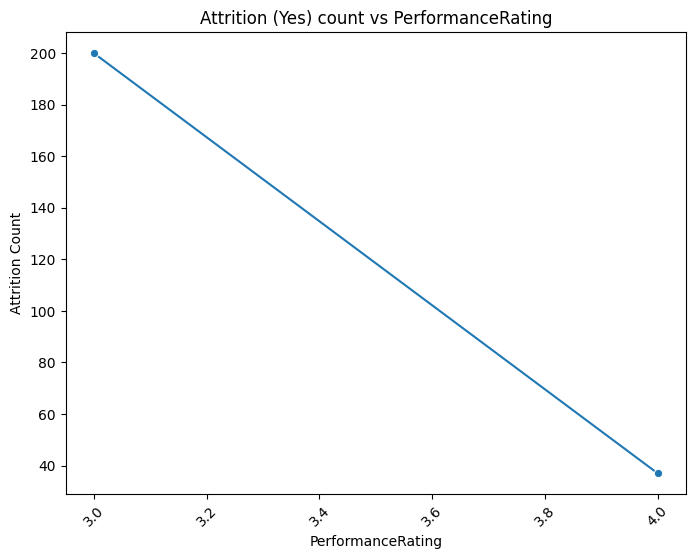

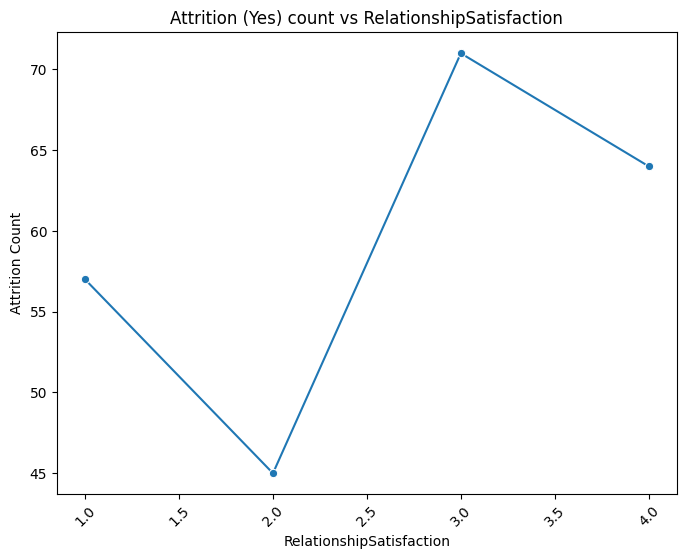

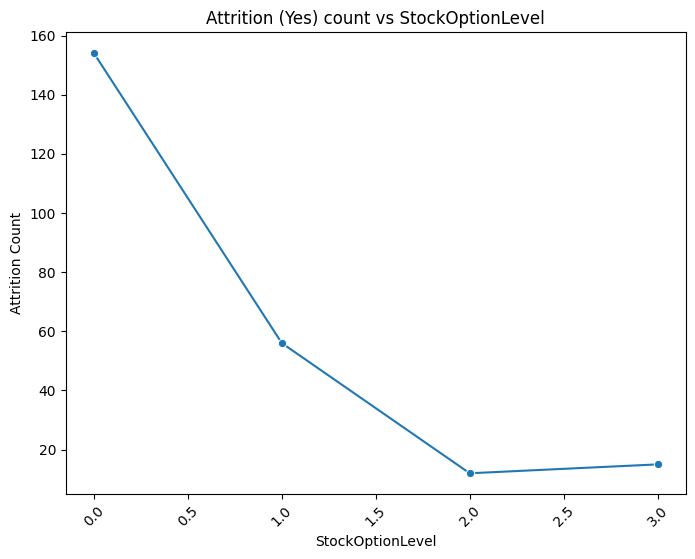

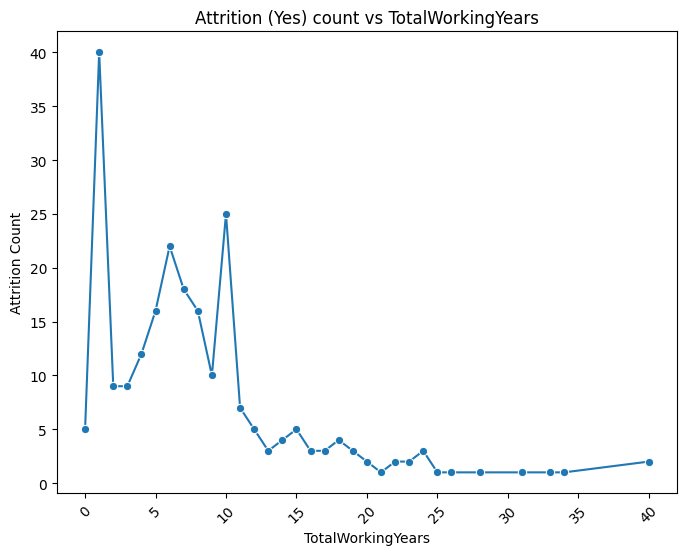

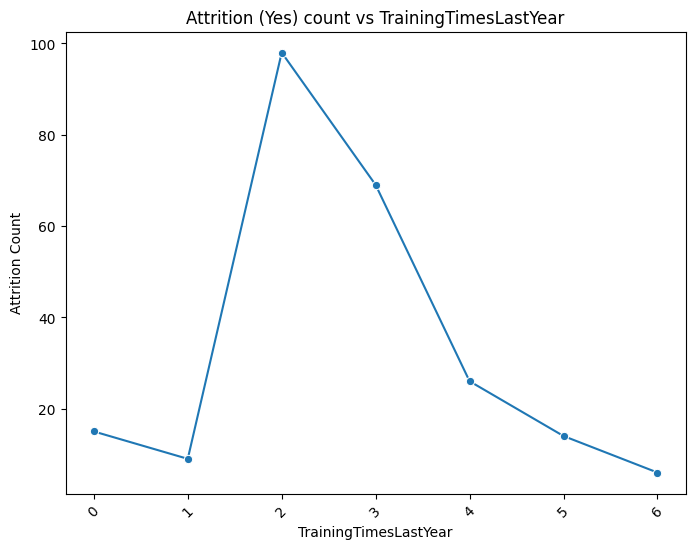

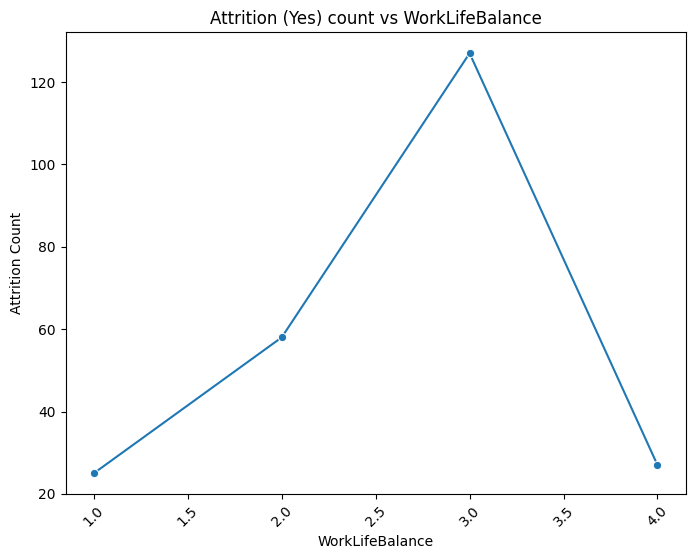

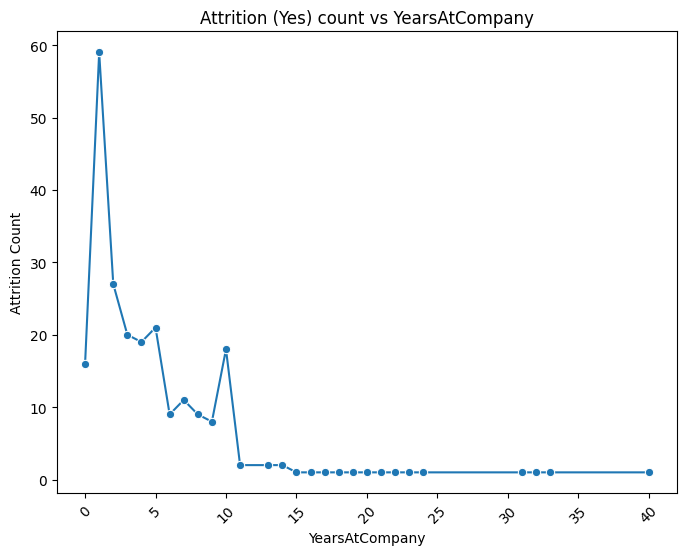

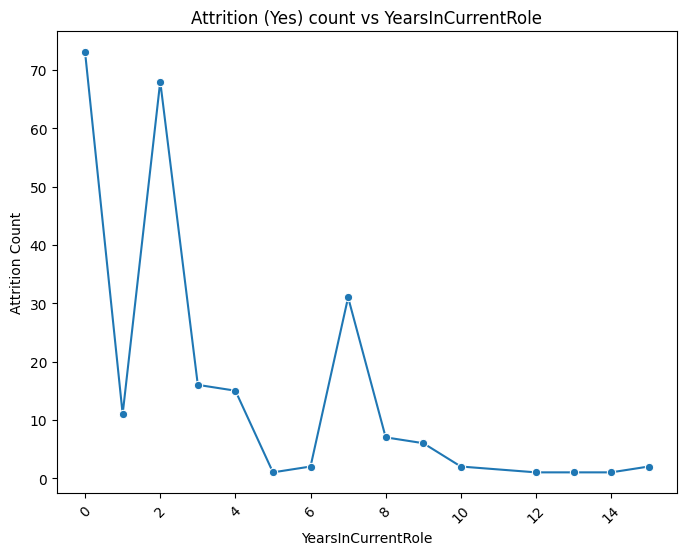

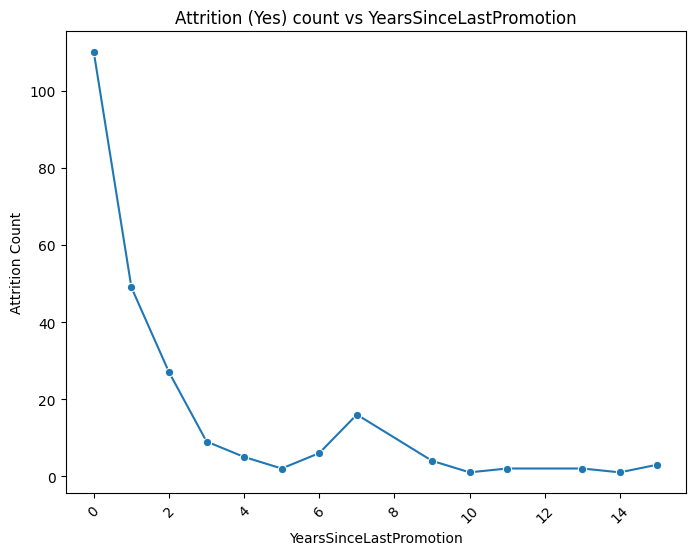

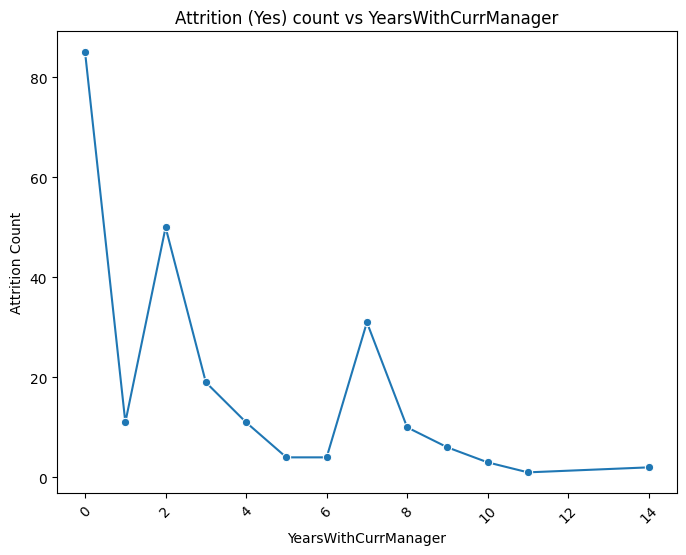

In [10]:
# Get the numeric columns (integer and float)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop(['EmployeeNumber','DailyRate','EmployeeCount','HourlyRate','MonthlyIncome','MonthlyRate','StandardHours','Age'])
# Filter the DataFrame for 'Attrition' equal to 'Yes'
df_yes_attrition = df[df['Attrition'] == 'Yes']
# Loop through each numeric column
for column in numeric_columns:
    # Calculate the count of 'Attrition' for each unique value in the current numeric column
    attrition_counts = df_yes_attrition.groupby(column)['Attrition'].count().reset_index()
    # Create line chart between the count of 'Attrition' and the current numeric column
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=attrition_counts, x=column, y='Attrition', marker='o')
    plt.title(f'Attrition (Yes) count vs {column}')
    plt.xlabel(column)
    plt.ylabel('Attrition Count')
    plt.xticks(rotation=45)
    plt.show()

In [11]:
# Encode 'Gender' column
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In [12]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Check unique values in the 'Attrition' column
print(df['Attrition'].unique())
# Encode 'Attrition' column
# If 'Yes' and 'No' are the only values, then you can encode them directly
# Otherwise, handle the case of previously unseen values
if set(df['Attrition'].unique()) == {'Yes', 'No'}:
    df['Attrition'] = label_encoder.fit_transform(df['Attrition'])
else:
    # Handle previously unseen values by encoding 'Yes' as 1 and 'No' as 0
    df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

['Yes' 'No']


In [13]:
# Separate features (X) and target variable (y)
X = df.select_dtypes(include=['int64', 'float64']).drop(['EmployeeNumber', 'EmployeeCount', 'Attrition'], axis=1)
y = df['Attrition']
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Instantiate the logistic regression model
model = LogisticRegression(max_iter=5000)
# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model.predict(X_test)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.891156462585034

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       255
           1       0.82      0.23      0.36        39

    accuracy                           0.89       294
   macro avg       0.86      0.61      0.65       294
weighted avg       0.88      0.89      0.86       294


Confusion Matrix:
[[253   2]
 [ 30   9]]


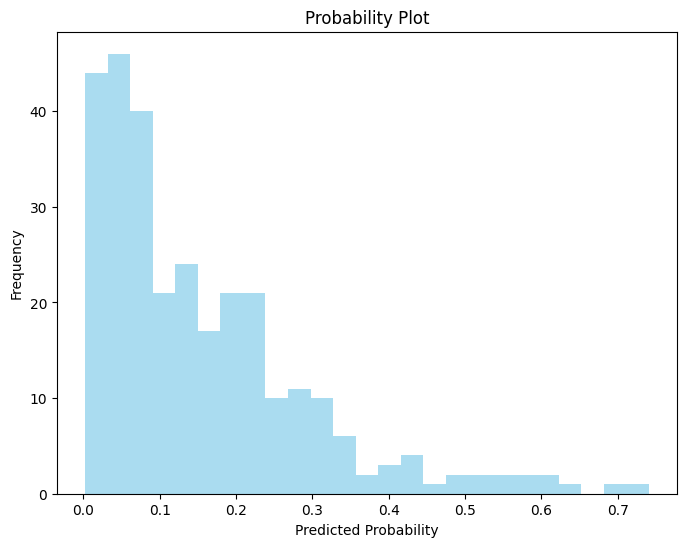

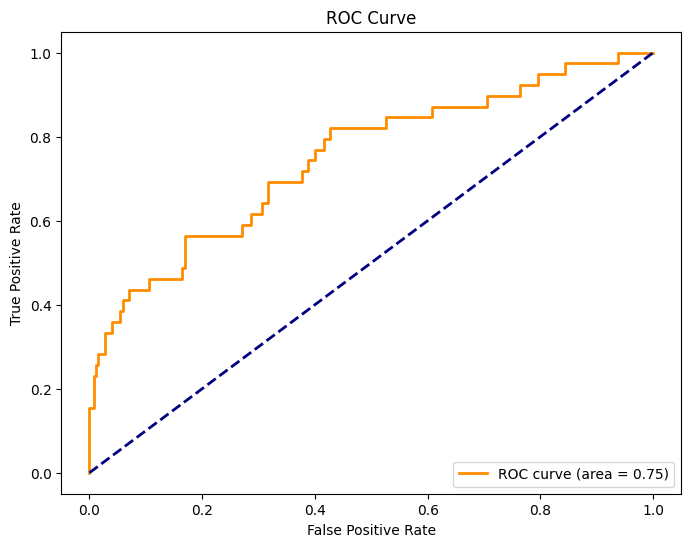

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Predict probabilities
probs = model.predict_proba(X_test)
preds = probs[:,1]
# Plot probability plot
plt.figure(figsize=(8, 6))
plt.hist(preds, bins=25, color='skyblue', alpha=0.7)
plt.title('Probability Plot')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()